##EDA

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
df = pd.read_csv('Real estate.csv')

In [86]:
df = df.drop('No', axis=1)


In [87]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [88]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<AxesSubplot:xlabel='X1 transaction date', ylabel='Count'>

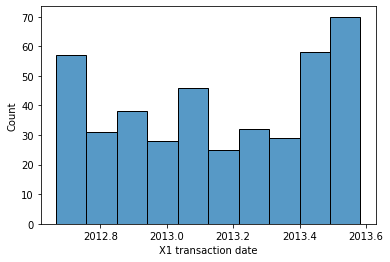

In [89]:
sns.histplot(df['X1 transaction date'])

array([[<AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>,
        <AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>,
        <AxesSubplot:title={'center':'X6 longitude'}>],
       [<AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

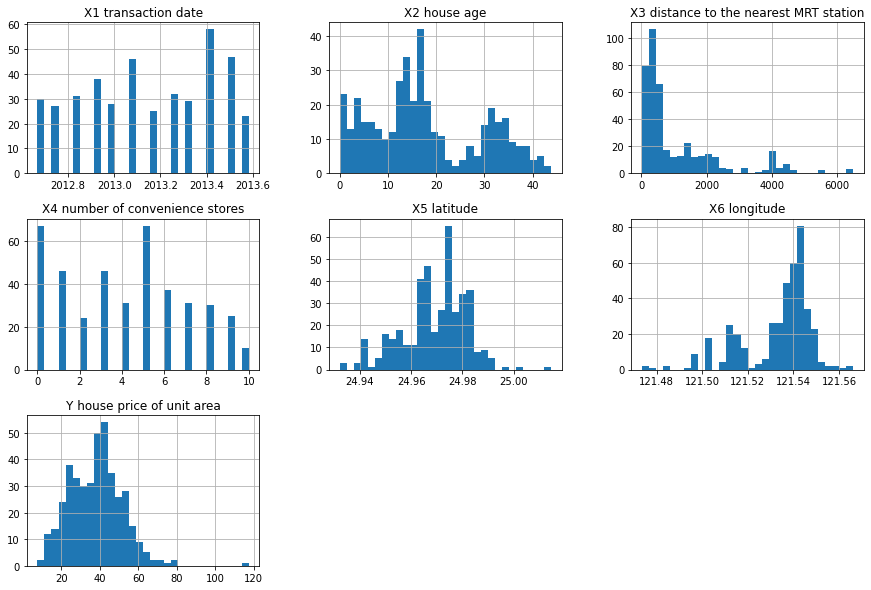

In [90]:
df.hist(bins=30, figsize=(15, 10))

In [91]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

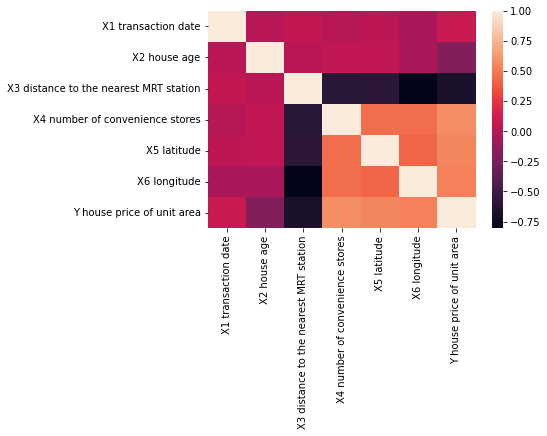

In [92]:
sns.heatmap(df.corr())

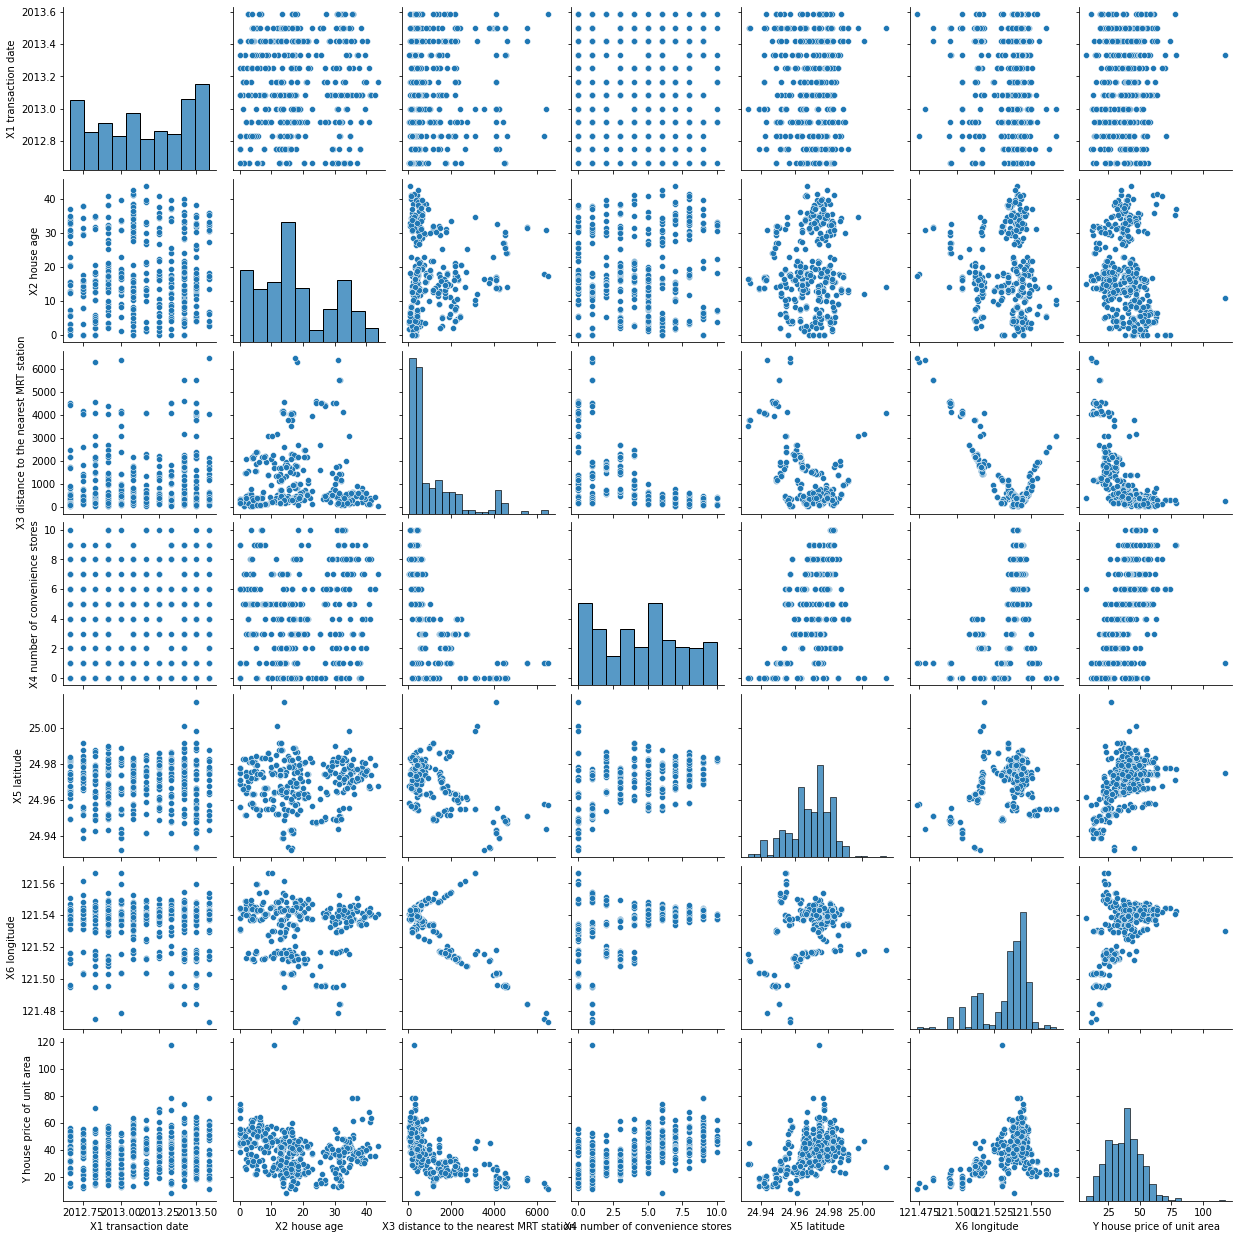

In [93]:
sns.pairplot(df)

##Decision to Normalize or Standardize

For this project, I have decided to normalize the data.
This is because of a few reasons outlined below:
- The data is mostly not bell shaped. Some of the histograms as seen above are skewed and not useful when standardized
- The data for the different columns are all on different scales. This will cause the model to overtrain on specific columns.

In [94]:
from sklearn import preprocessing

In [95]:
normalized_df = preprocessing.normalize(df)

In [96]:
normalized_df = pd.DataFrame(normalized_df)

In [97]:
normalized_df = normalized_df.rename(columns={0: 'transaction date', 1: 'house age', 2: 'distance to the nearest MRT station', 3: 'number of convenience stores', 4: 'latitude', 5: 'longitude', 6: 'house price of unit area'})

In [98]:
normalized_df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.871381,0.007671,0.358914,0.001930,0.010808,0.052606,0.017251
std,0.177865,0.005558,0.277563,0.001481,0.002208,0.010741,0.007984
min,0.296356,0.000000,0.011591,0.000000,0.003673,0.017878,0.001648
25%,0.809536,0.003407,0.141940,0.000491,0.010037,0.048880,0.010762
50%,0.969419,0.006338,0.237059,0.001919,0.012022,0.058524,0.018310
75%,0.987650,0.011414,0.584855,0.002960,0.012256,0.059630,0.022569
max,0.997753,0.021697,0.954898,0.004953,0.012377,0.060252,0.057702


##Multiple Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [116]:
X = normalized_df.drop('house price of unit area', axis=1)
y = normalized_df['house price of unit area']

In [117]:
from sklearn.feature_selection import RFE

NUM_FEATURES = 6
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=NUM_FEATURES)
fit = rfe.fit(X, y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
# calculate the score for the selected features
score = rfe.score(X,y)
print("Model Score with selected features is: ", score)


#6 features gives a score of 0.784804
#5 features gives a score of 0.726227

Num Features: 6
Selected Features: [ True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1]
Model Score with selected features is:  0.7848041558917571


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

modelLinReg = LinearRegression()

# Train the model
modelLinReg.fit(X_train, y_train)

# Use the model to make predictions
y_pred = modelLinReg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

mse

6.487545482396875e-06

Now using OLS

In [120]:
import statsmodels.api as sm

In [103]:
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

# Create an OLS model
ols_model = sm.OLS(y_train, X_train_with_constant)

# Fit the model
ols_results = ols_model.fit()

# Use the model to make predictions
y_pred_ols = ols_results.predict(X_test_with_constant)

# Evaluate the model
mse_ols = mean_squared_error(y_test, y_pred_ols)

mse_ols

6.487545482401079e-06

In [104]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
        
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


Add  distance to the nearest MRT station with p-value 7.73786e-117
Add  house age                      with p-value 1.4763e-10
Add  number of convenience stores   with p-value 0.00146099
resulting features:
['distance to the nearest MRT station', 'house age', 'number of convenience stores']


C:\Users\manit\AppData\Local\Temp\ipykernel_3424\3179247796.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\manit\AppData\Local\Temp\ipykernel_3424\3179247796.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\manit\AppData\Local\Temp\ipykernel_3424\3179247796.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\manit\AppData\Local\Temp\ipykernel_3424\3179247796.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

In [127]:
X_new = X[['distance to the nearest MRT station', 'house age', 'number of convenience stores']]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=101)


X_train_new = sm.add_constant(X_train_new)
X_test_new = sm.add_constant(X_test_new)

# Create an OLS model
ols_model_changed = sm.OLS(y_train_new, X_train_new)

# Fit the model
ols_results = ols_model_changed.fit()

# Use the model to make predictions
y_pred_ols_new = ols_results.predict(X_test_new)

# Evaluate the model
mse_ols_new = mean_squared_error(y_test_new, y_pred_ols_new)

mse_ols_new

6.487545482401079e-06

##Regularized Version of the Model


In [105]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [106]:
rr = Ridge(alpha=0.0001)

rr.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print( "ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

linear regression train score: 0.7556980381762006
linear regression test score: 0.8708257024312931
ridge regression train score low alpha: 0.7264451247868773
ridge regression test score low alpha: 0.8416974915905153


In [107]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

lasso00001 = Lasso(alpha=0.00001, max_iter=10000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print( "training score for alpha=0.0001:", train_score00001 )
print( "test score for alpha =0.0001: ", test_score00001)

training score for alpha=0.0001: 0.6943897854951754
test score for alpha =0.0001:  0.8090823234687974


I can see by using Lasso and Ridge, the results I have obtained are better and have increased.

##Cross Validation of all models

In [108]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [136]:
# prepare models
models = []

models.append(('linReg', modelLinReg))
models.append(('RidgeRegression', rr))
models.append(('LassoRegression', lasso))
models.append(('LassoRegression00001', lasso00001))

linReg: -0.002344 (0.000555)
RidgeRegression: -0.002523 (0.000532)
LassoRegression: -0.006498 (0.000941)
LassoRegression00001: -0.002813 (0.000589)


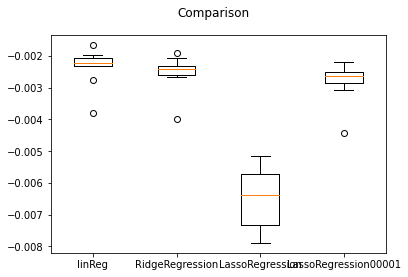

In [137]:
results = []
names = []

for name, mod in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle = True)
	cv_results = cross_val_score(mod, X, y, cv=kfold, scoring = 'neg_mean_absolute_error')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

fig = pyplot.figure()
fig.suptitle('Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

##Best Model

After doing cross validation on the different models, it can be seen that the linear regression model performs the best. I used negative mean squared error to evaluate the models, and the linear regression performed the best out of all the models.

##f)

After doing cross-validation on the different models, it can be seen that the linear regression model performs the best. I used negative mean squared error to evaluate the models, and the linear regression performed the best out of all the models.

The way cross-validation works is by splitting X and y into 5 equal “folds”. The model is then trained on 4 of the folds and evaluated on the other left-out fold. This process is repeated 5 times, with each of the 5 folds only used once for validation. The cross_val_score function then returns a list of the scores from each of the 5 evaluations. This gives an accurate assessment of how the model performs on unseen data.

Because the regularization is used to prevent overfitting, it works best on larger datasets and not the ones we are working with on this project. This set doesn’t have an issue with overfitting and the plain linear regression model performs better.

High-variance models are overly complex and overfit on the data. Ridge and lasso regressions are techniques that reduce overfitting and reduce the complexity of the model. Because our dataset does not struggle with this, ridge and lasso does not perform well.


##g)

After looking at the results from the Linear Regression model, OLS, Ridge Regression, and Lasso Regression, I do not find any discrepancies. The linear regression model has a r^2 value of 0.87 on the test set which is higher than any of the other models tested. It is not significantly greater, but is, on average, 1-2% greater than the other models. The OLS model performed the same as the Linear Regression Model.